In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# 이미지 사이즈와 필터 사이즈에 대한 기본 이해

(1, 3, 3, 1)


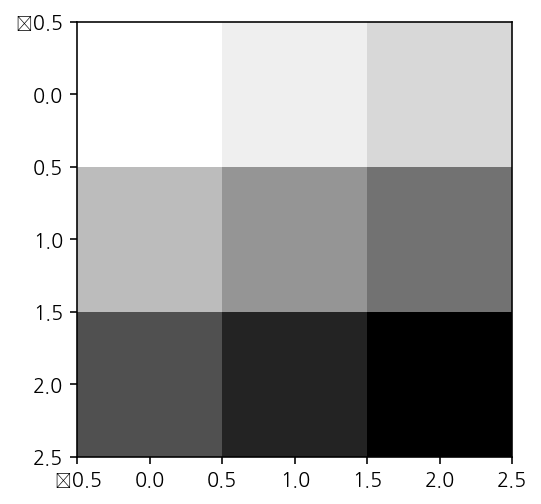

In [7]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='Greys')

In [26]:
filter = np.array([[[[1.]], [[1.]]],
                    [[[1.]], [[1.]]]])

In [28]:
filter.shape

(2, 2, 1, 1)

# MNIST 데이터를 CNN으로 구현하기

In [29]:
from tensorflow.examples.tutorials.mnist import input_data

In [30]:
tf.set_random_seed(777)

In [34]:
mnist = input_data.read_data_sets("Mnist_data/", one_hot=True)

Extracting Mnist_data/train-images-idx3-ubyte.gz
Extracting Mnist_data/train-labels-idx1-ubyte.gz
Extracting Mnist_data/t10k-images-idx3-ubyte.gz
Extracting Mnist_data/t10k-labels-idx1-ubyte.gz


In [50]:
# hyper parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100

Learning started. It takes sometime.
Epoch: 0001 cost = 0.373522481
Epoch: 0002 cost = 0.104377800
Epoch: 0003 cost = 0.079838302
Epoch: 0004 cost = 0.059814119
Epoch: 0005 cost = 0.052305761
Epoch: 0006 cost = 0.046126115
Epoch: 0007 cost = 0.038628239
Epoch: 0008 cost = 0.035642306
Epoch: 0009 cost = 0.030385547
Epoch: 0010 cost = 0.026972923
Epoch: 0011 cost = 0.025147075
Epoch: 0012 cost = 0.021376472
Epoch: 0013 cost = 0.019512898
Epoch: 0014 cost = 0.017578661
Epoch: 0015 cost = 0.016485061
Learning Finished!
Accuracy: 0.987
Label:  [2]
Prediction:  [2]


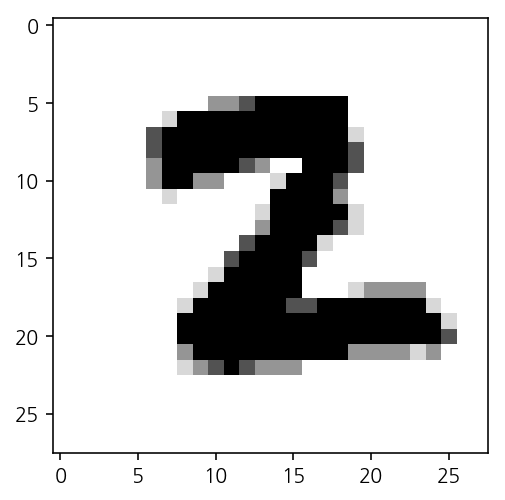

In [63]:
# input placeholders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1]) # 28x28x1사이즈의 흑백 이미지
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')


# Final FC 7x7x64 inputs -> 10 outputs 
# reduce dimensions
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
W3 = tf.get_variable('W3', shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L3, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

# train my model
    print('Learning started. It takes sometime.')
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X: batch_xs, Y: batch_ys}
            c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    print('Learning Finished!')

    # Test model and check accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:', sess.run(accuracy, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].
              reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()


In [62]:
tf.reset_default_graph()